## Distribución de la división de dos variables aleatorias poissonianas

In [1]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from datetime import datetime
from scipy.stats import poisson
from scipy.special import factorial
import time
%matplotlib inline

Vamos a usar Montecarlo para generar dos conjuntos de números con distribución poissoniana y después los vamos a dividir. Generamos M números.

In [15]:
M = 1000000 #cantidad de numeros que quiero generar
def montecarlo(a,b, f, fmax, param): #f depende de u y de un parametro
    aceptados =[]
    for i in range(0,5*M): #pongo hasta 5M para asegurarme de llegar a generar M
        y, z = rd.random(), rd.random()
        u,v = a+(b-a)*y, fmax*z
        if v<=f(u, param): 
            aceptados.append(round(u,0))
        if len(aceptados)==M: #cuando haya generados M numeros, ya esta
            break
    return aceptados

Por como está definida la función  `montecarlo `, no toma bien  `scipy.poisson `, entonces definimos una función para eso.

In [16]:
def distrib_poisson(k, mu):
    return (np.exp(-mu)*(mu**k))/factorial(k, exact=False)

Generamos dos conjuntos de números con distribución de Poisson, cada uno con su $\mu$. La variable  `límite ` está puesta a partir de un gráfico posterior ("hasta dónde llega" la distribución con ese $\mu$).

In [17]:
start_time = time.time()

limite1 = 30
mu1 = 10
x1 = np.arange(0,limite1)
generados1 = montecarlo(0, limite1, distrib_poisson, np.amax(poisson.pmf(x1,mu1)), mu1)

limite2 = 33
mu2 = 15
x2 = np.arange(0,limite2)
generados2 = montecarlo(0, limite2, distrib_poisson, np.amax(poisson.pmf(x2,mu2)), mu2)

print("--- %s segundos ---" % (time.time() - start_time)) #cuanto tarda en hacer los montecarlo

--- 56.3809998035 segundos ---


Hacemos gráficos para ver que haya funcionado todo bien y para verificar los valores de  `limite `.

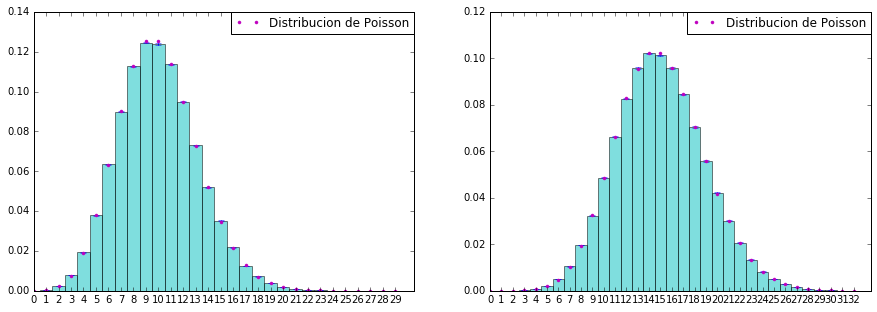

In [18]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


bines1 = np.arange(0.5,limite1 + 0.5)
numero1, bins1 = np.histogram(generados1, bins = bines1) 
error1 = np.sqrt(numero1) / (np.diff(bins1) * np.sum(numero1)) #error poissoniano (normalizado)
numero1 = numero1 / (np.diff(bins1) * np.sum(numero1)) #Normalizo a 1

ax1.bar(bins1[:-1], numero1, width = np.diff(bins1), yerr = error1, ecolor="b", color='c', alpha=0.5)
ax1.plot(x1,poisson.pmf(x1, mu1), 'm.', label = 'Distribucion de Poisson')
ax1.legend(loc=1, borderaxespad=0.)
ax1.set_xlim([0,limite1+0.5])
ax1.set_xticks(range(0,limite1))
#ax1.grid()

bines2 = np.arange(0.5,limite2 + 0.5)
numero2, bins2 = np.histogram(generados2, bins = bines2) 
error2 = np.sqrt(numero2) / (np.diff(bins2) * np.sum(numero2)) #error poissoniano (normalizado)
numero2 = numero2 / (np.diff(bins2) * np.sum(numero2)) #Normalizo a 1

ax2.bar(bins2[:-1], numero2, width = np.diff(bins2), yerr = error2, ecolor="b", color='c', alpha=0.5)
ax2.plot(x2,poisson.pmf(x2, mu2), 'm.', label = 'Distribucion de Poisson')
ax2.legend(loc=1, borderaxespad=0.)
ax2.set_xlim([0,limite2+0.5])
ax2.set_xticks(range(0,limite2))
#ax2.grid()

plt.show()

La variable aleatoria que buscamos es la división de dos poissonianas, entonces dividimos:

In [19]:
nuevos = []
for i in range(len(generados1)):
    if generados2[i] != 0:
        nuevos.append(generados1[i]/generados2[i])
        
print(len(nuevos))

999999


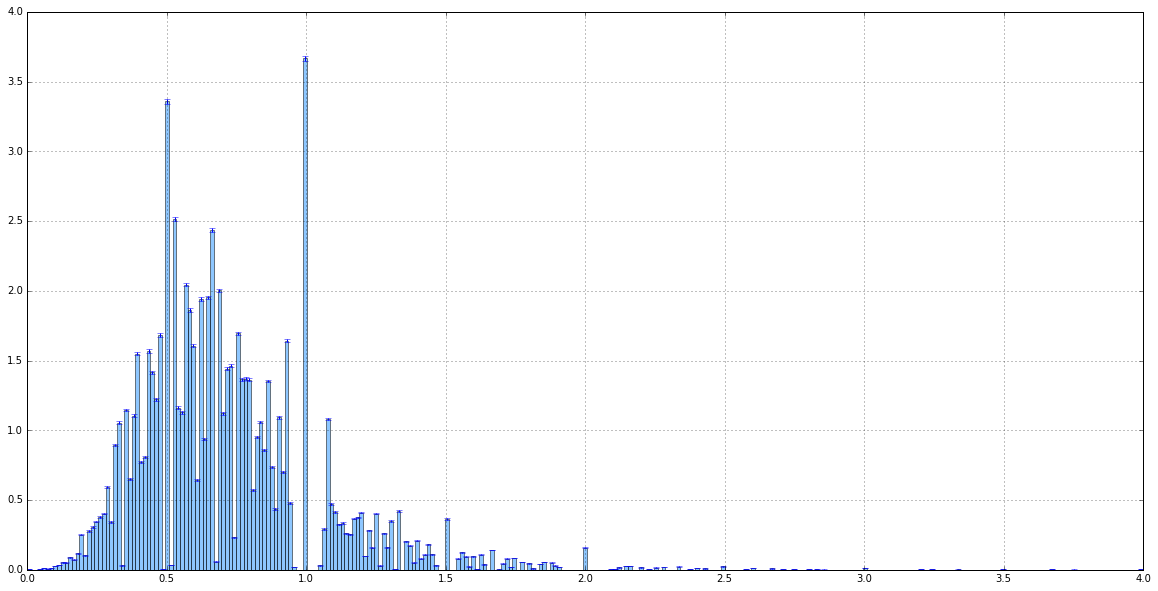

In [21]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 1, 1)

bines = 300

bines3 = np.linspace(0,4,bines)
numero3, bins3 = np.histogram(nuevos, bins = bines3)
error3 = (np.sqrt(numero3) / (np.diff(bins3) * np.sum(numero3)))
numero3 = numero3 / (np.diff(bins3) * np.sum(numero3)) #normalizo el area
ax1.bar(bins3[:-1], numero3, width = np.diff(bins3),  yerr=error3, ecolor="b", color='dodgerblue', alpha=0.5)
#ax1.set_xlabel('k')
#ax1.set_ylabel('P(k)')
ax1.grid()